In [4]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

---

#### <u>라쏘 회귀</u>

`선형 회귀`에 규제를 적용하는 데 `Ridge`의 대안으로 `Lasso`가 있다.<br>
`Lasso`회귀에서도 `Ridge`회귀와 똑같이 <u>계수를 0에 가깝게 만들려한다.</u>

> 하지만, `Ridge`와 달리 `Lasso`의 규제 방식은 `L1 규제`이다.

`Lasso`를 사용할 때 `Ridge`와 달리 어떤 계수는 정말 0이 되는 경우도 있다.<br>
즉 <u>완전히 제외되는 특성이 생긴다는 의미</u>이다.<br>
일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 알 수 있다.

보스턴 주택가격 데이터셋에 `Lasso`를 적용해보자

In [2]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


결과에서 확인 가능하듯이, `Lasso` 모델의 훈련 세트와 테스트 세트 모두 결과가 좋지 않다.<br>
이는 `과소 적합`이며 105개의 특성 중 4개만을 사용한 것을 확인할 수 있다.

`Ridge`와 마찬가지로 `Lasso`도 계수를 얼마나 0으로 보낼지를 조절하는 `alpha`매개변수를 지원한다.<br>
앞에서의 경우 default 값으로 alpha = 1이 적용되었다.<br>
<u>과소적합을 줄이기 위해서 `alpha` 값을 줄여 시행해보자</u><br>(이를 수행하기 위해서는 `max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 한다.)

In [7]:
# "max_iter" 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


`alpha` 값을 낮추면 모델의 복잡도는 증가하여 `훈련세트`와 `테스트세트`에서의 성능은 좋아진다.<br>
또한, 성능은 `Ridge`보다 조금 나으지만, 사용된 특성은 105개 중 33개 뿐이라 모델을 분석하기에는 용이하다.

그러나 `alpha`값을 너무 낮추면 규제의 효과가 없어져 결국 `과대적합`이 되기에, `LinearRegression`과 결과가 비슷해진다.

In [9]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96


또한, `alpha`값의 크기에 따라 계수는 다음과 같이 변한다.

Text(0, 0.5, 'params size')

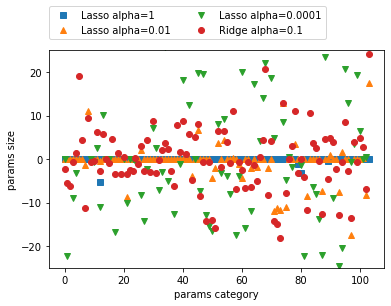

In [12]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("params category")
plt.ylabel("params size")

- `alpha = 1`일 때, 계수 대부분이 0일 뿐만 아니라 나머지 계수들도 크기가 작다는 것을 확인할 수 있다.
- `alpha = 0.01`일 때, 대부분의 특성이 0이되는 분포를 얻게 된다.
- `alpha = 0.0001`일 때, 대부분 0이 아니고 규제받지 않는 모델을 얻게 된다.

<br>

- 비교를 위해, `Ridge`의 `alpha = 0.1`일 때도 표기하였는데<br>`Lasso`의 `alpha = 0.1`때 값과 비교해보면 성능은 비슷하지만 어떤 계수도 0이되지 않는 것을 확인할 수 있다.

실제 이 두 모델 중 보통은 `Ridge`회귀를 더 선호한다.<br>
하지만 <u>특성이 많고 그 중 일부분만을 중요시 생각한다면 `Lasso`가 더 좋은 선택일 수 있다.</u>

<br>

또한 <u>분석하기 쉬운 모델을 원하다면<br>
`Lasso`가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델</u>을 만들어 줄 것이다.

`scikit-learn`에는 `Lasso`와 `Ridge`의 제약을 결합한 `ElasticNet`도 제공한다.<br>
실제로 이는 최상의 성능을 보이지만, `L1`, `L2` 두개의 매개변수를 조정해야만 한다.

---

### References

- 안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 활용한 머신러닝』, 박해선, 한빛미디어(2017)
- https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-3-%ec%84%a0%ed%98%95-%eb%aa%a8%eb%8d%b8/